In [132]:
using CSV
using DataFrames
using Distributions
using ShiftedArrays
using StatsPlots
using Optim

include("model.jl")

run_sim (generic function with 1 method)

In [133]:
params = SEIRModelParams(N0=10_000, days=360, λ0=0.2302, R0=2)
dump(params)

SEIRModelParams
  R0: Float64 2.0
  γ1: Float64 0.25
  γ2: Float64 0.06657789613848203
  γ3: Float64 0.14285714285714285
  P_AFP: Float64 0.005
  P_H: Float64 0.9
  P_AFP_sample: Float64 0.8
  P_AFP_test: Float64 0.97
  P_ES_test: Float64 0.97
  N0: Int64 10000
  I0_init: Int64 1
  λ0: Float64 0.2302
  days: Int64 360
  ES_n_freq: Int64 30
  β: Float64 0.13315579227696406


(t_ES = 13, t_AFP = 105, t_extinct = NaN, R_final = NaN)


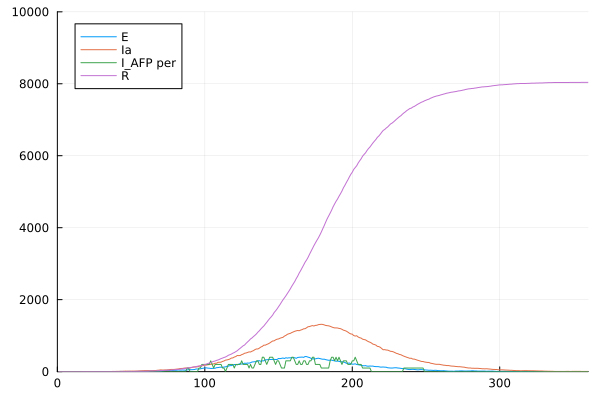

In [134]:
rec, outcome = run_sim(params; rec_flag=true)
println(outcome)
pl = plot(xlim=[0,360], ylim=[0,10000])
plot!(pl, 1:rec.days, rec.E, label="E")
plot!(pl, 1:rec.days, rec.Ia, label="Ia")
plot!(pl, 1:rec.days, rec.I_AFP*100, label="I_AFP per")
plot!(pl, 1:rec.days, rec.R, label="R")

In [135]:
outcomes = []
N_sim = 1000
for i in 1:N_sim
    rec, outcome = run_sim(params; rec_flag=false)
    push!(outcomes, outcome)
end
df = DataFrame(outcomes)
first(df, 5)

Row,t_ES,t_AFP,t_extinct,R_final
,Float64,Float64,Float64,Float64
1,5.0,NaN,8.0,1.0
2,23.0,170.0,NaN,NaN
3,38.0,83.0,NaN,NaN
4,NaN,NaN,3.0,1.0
5,NaN,NaN,16.0,1.0


In [136]:
outcome_num_prop(df)

Row,num,prop,outcome
,Int64,Float64,String
1,543,54.3,t_ES
2,506,50.6,t_AFP
3,500,50.0,t_extinct
4,500,50.0,R_final


In [137]:
detect_pattern(df)

Dict{Any, Int64} with 3 entries:
  "Both"    => 506
  "Neither" => 457
  "ES only" => 37

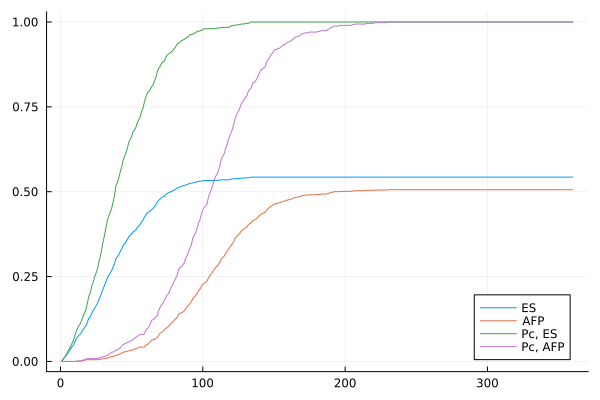

In [147]:
days = params.days
ts_ES = df[:, "t_ES"]
ts_AFP = df[:, "t_AFP"]
t_extinct = df[:, "t_extinct"]
cum_ES = cumulative_counts(ts_ES, params.days; prop=true)
cum_AFP = cumulative_counts(ts_AFP, params.days; prop=true)
plot(1:params.days, cum_ES, label="ES", fmt=:png)
plot!(1:params.days, cum_AFP, label="AFP")

cum_ES = conditional_cumulative_prob(ts_ES, t_extinct, params.days)
cum_AFP = conditional_cumulative_prob(ts_AFP, t_extinct, params.days)
plot!(1:params.days, cum_ES, label="Pc, ES")
plot!(1:params.days, cum_AFP, label="Pc, AFP")



Summary Stats:
Length:         506
Missing Count:  0
Mean:           63.077075
Minimum:        -54.000000
1st Quartile:   38.000000
Median:         61.000000
3rd Quartile:   87.000000
Maximum:        201.000000
Type:           Float64

% of early detect by ES: 94.27

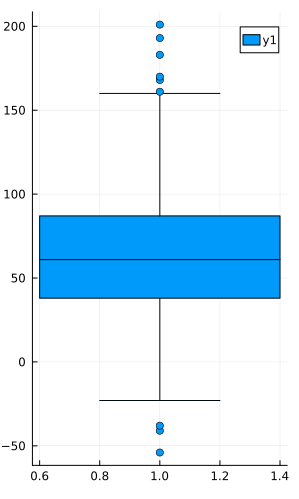

In [149]:
diff = leadtime_diff(df)
leadtime_diff_statistics(diff)

Need of inclusion of other vaccinated individuals to the model.


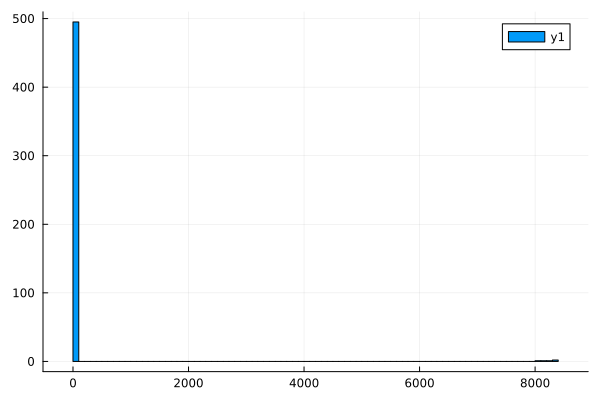

In [144]:
println("Need of inclusion of other vaccinated individuals to the model.")
histogram(df[:, :R_final], bins=100)